In [50]:
# Add project root to sys.path so we can import from src/
import sys
from pathlib import Path
project_root = Path().absolute().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
sys.modules.pop("src.data_processing", None)
sys.modules.pop("src.models", None)

from src.models import train_test_split_numpy, LogisticRegressionNumPy, accuracy_score_numpy, precision_recall_f1_numpy, calculate_roc_auc_numpy, calculate_metrics
import numpy as np
import matplotlib.pyplot as plt

In [51]:
data_loaded = np.load('../data/processed/data_processed.npz')
X = data_loaded['X_features']
y = data_loaded['y_target']

In [52]:
# Thực hiện chia tập
X_train, X_test, y_train, y_test = train_test_split_numpy(X, y, test_size=0.2)

X_train: (14526, 158), X_test: (3631, 158)
y_train: (14526, 1), y_test: (3631, 1)



✅ Huấn luyện mô hình hoàn thành.


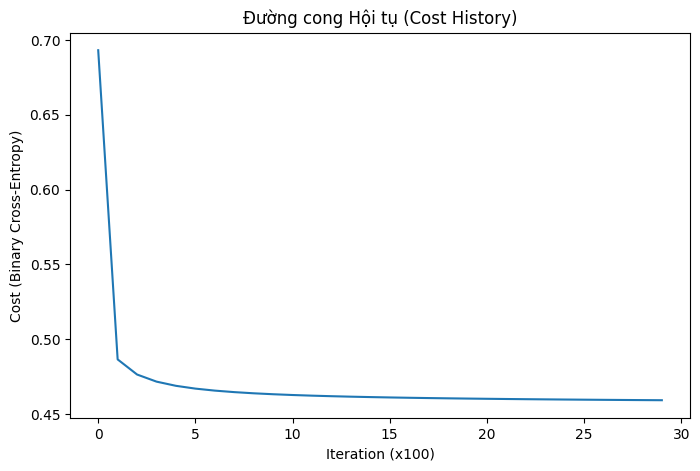

In [53]:
model = LogisticRegressionNumPy(learning_rate=0.1, n_iterations=3000)

# Huấn luyện
model.fit(X_train, y_train)

print("\n✅ Huấn luyện mô hình hoàn thành.")

# Trực quan hóa đường cong hội tụ (Cost History)
plt.figure(figsize=(8, 5))
plt.plot(model.cost_history)
plt.title("Đường cong Hội tụ (Cost History)")
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.show()

In [54]:
y_pred = model.predict(X_test)

accuracy = accuracy_score_numpy(y_test, y_pred)
TN, TP, FN, FP, precision, recall, f1_score = precision_recall_f1_numpy(y_test, y_pred)

print("\n--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}\n")

print("--- MA TRẬN NHẦM LẪN (CONFUSION MATRIX) ---")
print(f"TP (Dự đoán đổi việc đúng): {TP}")
print(f"FP (Dự đoán đổi việc sai): {FP}")
print(f"FN (Bỏ sót người đổi việc): {FN}")
print(f"TN (Dự đoán ở lại đúng): {TN}")


--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---
Accuracy: 0.7764
Precision: 0.5980
Recall: 0.3315
F1-Score: 0.4266

--- MA TRẬN NHẦM LẪN (CONFUSION MATRIX) ---
TP (Dự đoán đổi việc đúng): 302
FP (Dự đoán đổi việc sai): 203
FN (Bỏ sót người đổi việc): 609
TN (Dự đoán ở lại đúng): 2517



--- KẾT QUẢ ROC & AUC ---

AUC: 0.7998


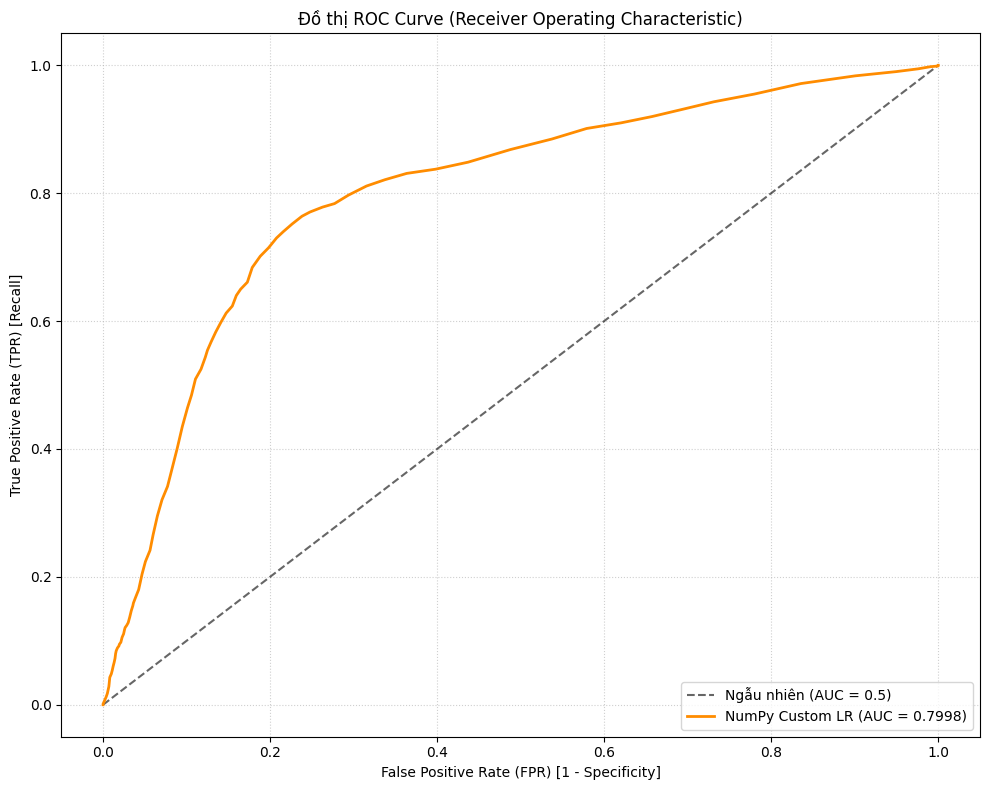

In [55]:
y_proba_custom = model.predict_proba(X_test)

fpr_np, tpr_np, auc_np = calculate_roc_auc_numpy(y_test, y_proba_custom)

print("\n--- KẾT QUẢ ROC & AUC ---\n")
print(f"AUC: {auc_np:.4f}")

plt.figure(figsize=(10, 8))

plt.plot([0, 1], [0, 1], 'k--', label='Ngẫu nhiên (AUC = 0.5)', alpha=0.6) 

plt.plot(fpr_np, tpr_np, label=f'NumPy Custom LR (AUC = {auc_np:.4f})', color='darkorange', linewidth=2)

plt.xlabel('False Positive Rate (FPR) [1 - Specificity]')
plt.ylabel('True Positive Rate (TPR) [Recall]')
plt.title('Đồ thị ROC Curve (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression

sk_model = LogisticRegression(
    solver='liblinear', 
    random_state=42, 
    max_iter=3000, 
    C=1.0 # Tham số kiểm soát Regularization (Giảm Overfitting)
)

sk_model.fit(X_train, y_train.flatten()) 

print("\n✅ Huấn luyện mô hình bằng Scikit-learn hoàn tất.")

# Dự đoán trên tập kiểm tra
y_pred_sk = sk_model.predict(X_test)


✅ Huấn luyện mô hình bằng Scikit-learn hoàn tất.


In [57]:
y_true_flat = y_test.flatten()

metrics_numpy = calculate_metrics(y_true_flat, y_pred, 'NumPy Custom LR')

metrics_sk = calculate_metrics(y_true_flat, y_pred_sk, 'Scikit-learn LR')

print("\n--- KẾT QUẢ SO SÁNH HIỆU SUẤT ---\n")

header_format = f"{{:<15}} | {{:<17}} | {{:<17}}"

print(header_format.format("Độ đo", "NumPy Custom", "Scikit-learn"))
print("-" * 55)

row_format = f"{{:<15}} | {{:<17.4f}} | {{:<17.4f}}"

print(row_format.format("Accuracy", metrics_numpy['Accuracy'], metrics_sk['Accuracy']))
print(row_format.format("Precision", metrics_numpy['Precision'], metrics_sk['Precision']))
print(row_format.format("Recall", metrics_numpy['Recall'], metrics_sk['Recall']))
print(row_format.format("F1-Score", metrics_numpy['F1-Score'], metrics_sk['F1-Score']))


--- KẾT QUẢ SO SÁNH HIỆU SUẤT ---

Độ đo           | NumPy Custom      | Scikit-learn     
-------------------------------------------------------
Accuracy        | 0.7764            | 0.7761           
Precision       | 0.5980            | 0.5932           
Recall          | 0.3315            | 0.3425           
F1-Score        | 0.4266            | 0.4342           


### 1. Kết luận
- Sự khác biệt rất nhỏ giữa các độ đo cho thấy thuật toán **Logistic Regression** được huấn luyện bằng **Gradient Descent tự cài đặt bằng NumPy** hoạt động chính xác và hội tụ hiệu quả, cho kết quả **tương đương với mô hình chuẩn của thư viện Scikit-learn**.

---

### 2. Phân tích Chi tiết các Độ đo

- **Accuracy (≈ 0.776):** Cả hai mô hình đều có độ chính xác tổng thể khoảng 77.6%. Đây là một chỉ số tốt nhưng cần phải xem xét kỹ hơn do tính chất mất cân bằng của dữ liệu.

- **Precision (Độ chính xác):** Mô hình **NumPy Custom LR** có Precision cao hơn một chút *(0.5980 so với 0.5932)*. Điều này có nghĩa là trong số các dự đoán *"sẽ đổi việc"* (Positive), mô hình NumPy ít mắc lỗi cảnh báo sai (*False Positive*) hơn.

- **Recall (Độ nhạy):** Mô hình **Scikit-learn** có Recall cao hơn *(0.3425 so với 0.3315)*. Điều này có nghĩa là mô hình Scikit-learn tìm thấy được một tỷ lệ lớn hơn số người thực sự muốn đổi việc (*True Positive*).

---

### 3. Insight Quan trọng (Dữ liệu Mất cân bằng)

- Chỉ số **Recall** và **F1-score** vẫn còn tương đối thấp *(khoảng 0.33 – 0.43)*.

- Trong bài toán dự đoán sự thay đổi công việc, Recall thấp *(33%)* là một vấn đề lớn vì nó đồng nghĩa với việc mô hình bỏ sót (*False Negative*) đến **67%** số người thực sự có ý định nghỉ việc.

- Việc sử dụng các độ đo độc lập với ngưỡng như **AUC** và **ROC Curve** là cần thiết để đánh giá toàn diện hơn và xác định được ngưỡng cắt tối ưu cho mô hình này.
